In [1]:
import scipy.integrate as integrate
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.animation import FuncAnimation
from IPython import display

# SIR model

In [2]:
# ODEs
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    
    dS_dt = -beta*S*I
    dI_dt = beta*S*I - gamma*I
    dR_dt = gamma*I
    
    return([dS_dt, dI_dt, dR_dt])

In [3]:
# initial conditions
S0 = 0.9
I0 = 0.1
R0 = 0
beta = 0.35
gamma = 0.1

t = np.linspace(0,100,10000)

solution = integrate.odeint(SIR_model, [S0, I0, R0], t, args=(beta,gamma))
solution = np.array(solution)

Text(0, 0.5, 'Proportions')

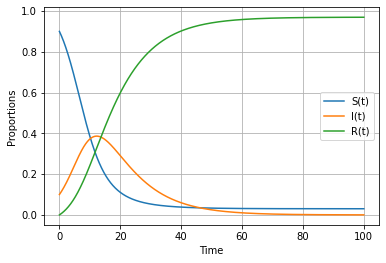

In [4]:
plt.figure(figsize=[6,4])
plt.plot(t, solution[:,0], label="S(t)")
plt.plot(t, solution[:,1], label="I(t)")
plt.plot(t, solution[:,2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")

# ED model

In [5]:
def ED_model(S0, I0, R0, t, beta, gamma):
    S = np.zeros(t+1)
    I = np.zeros(t+1)
    R = np.zeros(t+1)

    i=0
    S[i] = S0
    I[i] = I0
    R[i] = R0
    
    while(i<t):
        
        dS_dt = -(beta/(1+beta*I[i]))*S[i]*I[i]
        dI_dt = (beta/(1+beta*I[i]))*S[i]*I[i] - gamma*I[i]
        dR_dt = gamma*I[i]
        
        S[i+1] = S[i] + dS_dt
        I[i+1] = I[i] + dI_dt
        R[i+1] = R[i] + dR_dt
        
        i=i+1
    
    return([S, I, R])

In [6]:
# initial conditions
S0 = 0.9
I0 = 0.1
R0 = 0
B = 0.35
G = 0.1

t2 = 100
solution2 = ED_model(S0, I0, R0, t2, B, G)

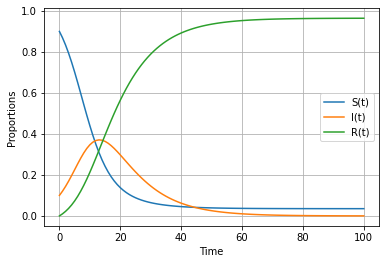

In [7]:
# plot result
plt.plot(solution2[0], label="S(t)")
plt.plot(solution2[1], label="I(t)")
plt.plot(solution2[2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.show()

# ID Model

In [8]:
# ODE
def ID_model(S0, I0, R0, t, beta, gamma):
    S = np.zeros(t+1)
    I = np.zeros(t+1)
    R = np.zeros(t+1)

    i=0
    S[i] = S0
    I[i] = I0
    R[i] = R0
    
    while(i<t):
        a = 2*beta*(1+gamma)
        b = 1+gamma-beta*S[i]-2*beta*I[i]
        c = -I[i]

        I[i+1] = ((-b+np.sqrt(b**2 - 4*a*c))/(2*a))
        S[i+1] = ((1+beta*I[i+1])/(1+2*beta*I[i+1]))*S[i]
        R[i+1] = R[i] + gamma*I[i+1]
        
        i=i+1
    
    return([S, I, R])

In [9]:
# initial conditions
S0 = 0.9
I0 = 0.1
R0 = 0
B = 0.35
G = 0.1
t3 = 100
solution3 = ED_model(S0, I0, R0, t2, B, G)

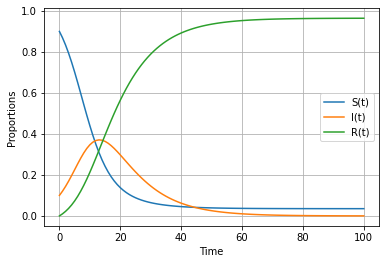

In [10]:
# plot result
plt.plot(solution3[0], label="S(t)")
plt.plot(solution3[1], label="I(t)")
plt.plot(solution3[2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.show()

Text(0.5, 1.0, 'ID-SIR')

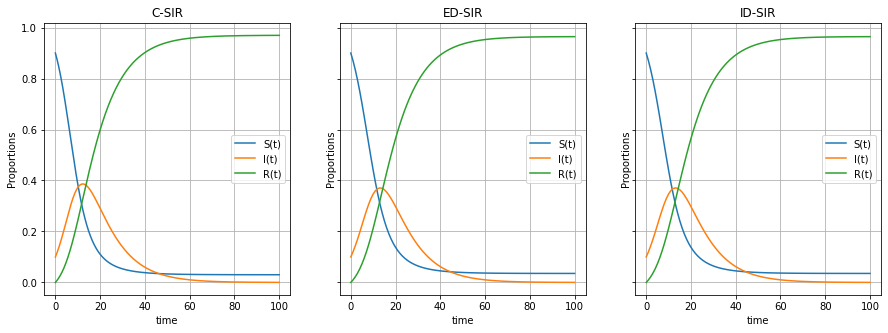

In [11]:
# All 3 on same graph
fig, axs = plt.subplots(1, 3, sharey=True, figsize=[15,5])

axs[0].plot(t, solution[:,0], label="S(t)")
axs[0].plot(t, solution[:,1], label="I(t)")
axs[0].plot(t, solution[:,2], label="R(t)")
axs[0].set_ylabel('Proportions')
axs[0].set_xlabel('time')
axs[0].grid()
axs[0].legend()
axs[0].set_title("C-SIR")


axs[1].plot(solution2[0], label="S(t)")
axs[1].plot(solution2[1], label="I(t)")
axs[1].plot(solution2[2], label="R(t)")
axs[1].set_ylabel('Proportions')
axs[1].set_xlabel('time')
axs[1].grid()
axs[1].legend()
axs[1].set_title("ED-SIR")

axs[2].plot(solution3[0], label="S(t)")
axs[2].plot(solution3[1], label="I(t)")
axs[2].plot(solution3[2], label="R(t)")
axs[2].set_ylabel('Proportions')
axs[2].set_xlabel('time')
axs[2].grid()
axs[2].legend()
axs[2].set_title("ID-SIR")

# Match to Papers Initial conditions

In [12]:
t = np.linspace(0,240,60000)
t2 = 240
t3 = 240
B = (0.225)
G = (1/6)
S0 = (18222/18233)
I0 = (11/18233)
R0 = 0

solution = integrate.odeint(SIR_model, [S0, I0, R0], t, args=(B,G))
solution2 = ED_model(S0, I0, R0, t2, B, G)
solution3 = ID_model(S0, I0, R0, t3, B, G)

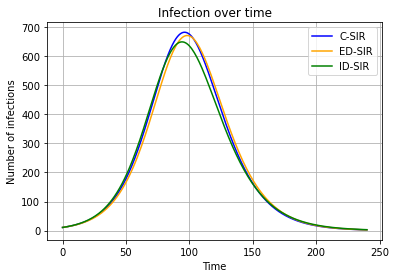

In [13]:
plt.figure(figsize=[6,4])
plt.plot(t, solution[:,1]*18233, label="C-SIR", color = "blue")
plt.plot(solution2[1]*18233, label="ED-SIR", color = "orange")
plt.plot(solution3[1]*18233, label="ID-SIR", color = "green")

plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Number of infections")
plt.title("Infection over time")

# Clearly data fitting is need as our timescale is accross 240 rather than 40 days

plt.savefig("/Users/liamgallagher/Desktop/BioImage2.png")

# Import data

In [14]:
import pandas as pd
 
data = pd.read_excel("/Users/liamgallagher/Downloads/H1N1_Data.xlsx")
#data

/Users/liamgallagher/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            111 non-null    object 
 1   Days            110 non-null    float64
 2   Reported cases  111 non-null    int64  
 3   Unnamed: 3      1 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ KB


In [16]:
Casestotal = data["Reported cases"]
Cases = np.zeros([41])
Cases = Casestotal[0:41]
day40 = np.arange(0,40,1)
len(Cases)

41

In [17]:
Infected = np.zeros([40])

# Sort Data

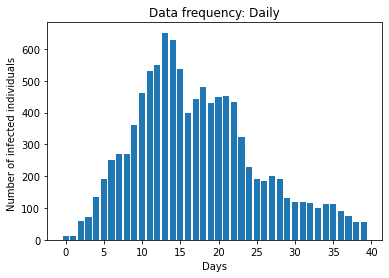

In [18]:
# Assusiming people recover every 6 days
# Daily
i=0
Caught = 0
recovery = 6
Infected = np.zeros([40])
while(i<40):
    Caught += Cases[i]
    if(i>=recovery):
        Caught = Caught - Cases[i-recovery]
    
    Infected[i] = Caught
    i=i+1

#print(Recovered)
day40 = np.arange(0,40,1)
plt.bar(day40,Infected)
#print(len(Infected))
#print(Infected)

plt.title("Data frequency: Daily")
plt.xlabel("Days")
plt.ylabel("Number of infected individuals ")

plt.savefig("/Users/liamgallagher/Desktop/BioImage3.png")

[ 11.  58. 136. 251. 269. 461. 551. 629. 400. 481. 448. 433. 229. 186.
 192. 120. 117. 111.  92.  57.]


Text(0, 0.5, 'Number of infected individuals ')

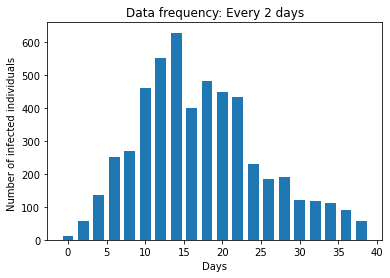

In [19]:
# Every 2 days
recovery = 6

Infected2 = np.zeros([20])
Infected2[0] = Cases[0]
Caught = Cases[0]
i=1
j=1
while(i<39):
    Caught += Cases[i] + Cases[i+1]
    if(j==3):
        Caught = Caught - Cases[i+1-recovery]
    if(i>=recovery):
        Caught = Caught - Cases[i-recovery] - Cases[i+1-recovery]

    Infected2[j] = Caught
    i=i+2
    j=j+1

#plt.plot(Infected)
#print(Recovered)
print(Infected2)
day20 = np.arange(0,40,2)
plt.bar(day20,Infected2, width = 1.4)

plt.title("Data frequency: Every 2 days")
plt.xlabel("Days")
plt.ylabel("Number of infected individuals ")

14
[ 11.  73. 251. 360. 551. 537. 481. 452. 229. 200. 120. 101.  92.  57.]


Text(0, 0.5, 'Number of infected individuals ')

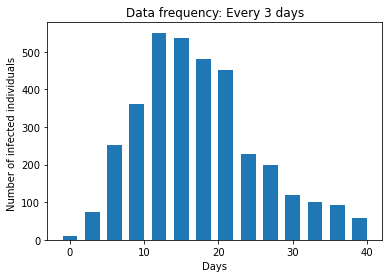

In [20]:
#Every 3 days
recovery = 6

Recovered3 = np.zeros([14])
Infected3 = np.zeros([14])
Infected3[0] = Cases[0]
Caught = Infected3[0]
i=1
j=1
while(i<39):
    Caught += Cases[i] + Cases[i+1] + Cases[i+2]
    if(j==2):
        Caught = Caught - Cases[i+2-recovery]
    if(i>=recovery):
        Caught = Caught - Cases[i-recovery] - Cases[i+1-recovery] - Cases[i+2-recovery]
        Recovered3[j] += Recovered3[j-1] + Cases[i-recovery]
    
    Infected3[j] = Caught
    
    i=i+3
    j=j+1

day13 = np.arange(0,42,3)

print(len(Infected3))
day13 = np.arange(0,42,3)
plt.bar(day13,Infected3, width = 2)
print(Infected3)

plt.title("Data frequency: Every 3 days")
plt.xlabel("Days")
plt.ylabel("Number of infected individuals ")

[ 11. 136. 269. 551. 400. 448. 229. 192. 117.  92.]


Text(0, 0.5, 'Number of infected individuals ')

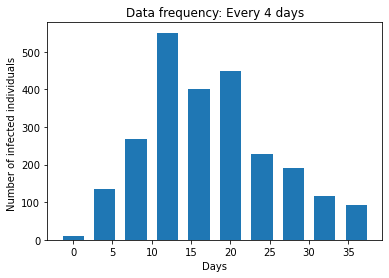

In [833]:
# Every 4 days
recovery = 6

Recovered4 = np.zeros([10])
Infected4 = np.zeros([10])
Infected4[0] = Cases[0]

i=1
j=1
Caught = Infected4[0]
while(i<37):
    Caught += Cases[i] + Cases[i+1] + Cases[i+2] + Cases[i+3] 
    
    if(j==2):
        Caught = Caught - Cases[i+1-recovery] - Cases[i+2-recovery] - Cases[i+3-recovery]
    if(j>2):
        Caught = Caught - Cases[i-recovery] - Cases[i+1-recovery] - Cases[i+2-recovery] - Cases[i+3-recovery]
        
    Infected4[j] = Caught
    
    i=i+4
    j=j+1

#plt.plot(Infected)
#print(Recovered)
day10 = np.arange(0,40,4)
plt.bar(day10,Infected4, width = 2.7)
print(Infected4)

plt.title("Data frequency: Every 4 days")
plt.xlabel("Days")
plt.ylabel("Number of infected individuals ")

Text(0, 0.5, 'Number of infected individuals ')

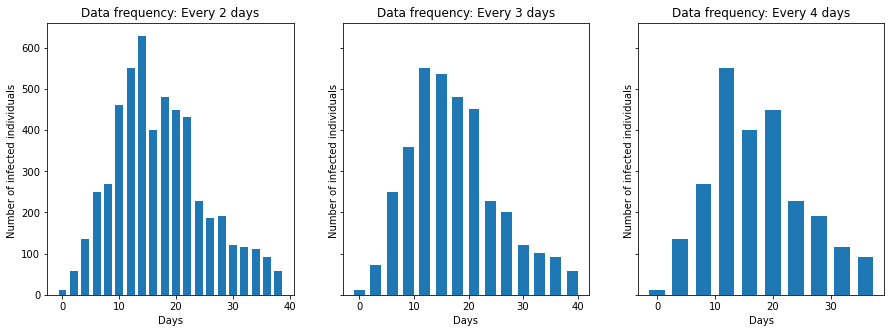

In [834]:
# Last 3 on the same graph
fig, axs = plt.subplots(1, 3, sharey=True, figsize=[15,5])

axs[0].bar(day20,Infected2, width = 1.4)
axs[0].set_title("Data frequency: Every 2 days")
axs[0].set_xlabel("Days")
axs[0].set_ylabel("Number of infected individuals ")

axs[1].bar(day13,Infected3, width = 2)
axs[1].set_title("Data frequency: Every 3 days")
axs[1].set_xlabel("Days")
axs[1].set_ylabel("Number of infected individuals ")

axs[2].bar(day10,Infected4, width = 2.7)
axs[2].set_title("Data frequency: Every 4 days")
axs[2].set_xlabel("Days")
axs[2].set_ylabel("Number of infected individuals ")


# Statistical anaylsis (AIC)

In [835]:
def AIC(EXP,INF,k):
    i = 0
    SSR = 0
    AIC = 0
    nd = len(EXP)
    while(i<nd-1):
        SSR += (EXP[i]*18233-INF[i])**2
        i=i+1
    AIC =  nd*np.log(SSR/nd)+((2*nd*(k+1))/(nd-k-2))
    
    return AIC

# Paramter Search

In [836]:
def SearchAIC_ED(Infected, tbeta, alpha):
    i=0
    Check = 10000.0
    GAMMA = (1/6)
    while(i<61): 
        j=0
        BETA=0.22
        while(j<31):
            B = BETA*alpha
            G = GAMMA*alpha
            sol66 = ED_model(S0, I0, R0, tbeta, B, G)
  
            TrueAIC = AIC(sol66[1],Infected,2)
        
            if(Check>TrueAIC):
                Check = TrueAIC
                Betaval = B/alpha
                alphaval = alpha

            BETA = BETA + 0.001
            j=j+1
    
        alpha = alpha + 0.1
        i=i+1
    
    return ([Check, Betaval, alphaval])
print(SearchAIC_ED(Infected, 39,5))
print(SearchAIC_ED(Infected2, 19,8))
print(SearchAIC_ED(Infected3, 13,18))
print(SearchAIC_ED(Infected4, 9,26))

[390.5070613949219, 0.22700000000000004, 6.599999999999994]
[203.36748385423715, 0.229, 13.59999999999998]
[144.99659907712723, 0.233, 21.200000000000045]
[109.68453737601118, 0.229, 30.000000000000057]


In [837]:
def SearchAIC_ID(Infected, tbeta, alpha):
    i=0
    Check = 10000.0
    GAMMA = (1/6)
    while(i<61): 
        BETA = 0.22
        j=0
        while(j<31):
            B = BETA*alpha
            G = GAMMA*alpha
            sol66 = ID_model(S0, I0, R0, tbeta, B, G)
  
            TrueAIC = AIC(sol66[1],Infected,2)
        
            if(Check>TrueAIC):
                Check = TrueAIC
                Betaval = B/alpha
                alphaval = alpha
            BETA = BETA + 0.001
            j=j+1
    
        alpha = alpha + 0.1
        i=i+1
    
    return ([Check, Betaval, alphaval])   
print(SearchAIC_ID(Infected, 39,5))
print(SearchAIC_ID(Infected2, 19,8))
print(SearchAIC_ID(Infected3, 13,12))
print(SearchAIC_ID(Infected4, 9,15))

[345.22354199969675, 0.232, 5.399999999999999]
[164.91126187000748, 0.23700000000000004, 9.599999999999994]
[108.8940275063864, 0.24000000000000002, 12.999999999999996]
[90.25446121610715, 0.23700000000000002, 16.700000000000006]


# Animation

In [838]:
# Optimal AIC at each step
AICvalues = np.zeros(61)
BETA = 0.232
GAMMA = (1/6)
Check = 10000
tbeta = 39
i=0
alpha = 4
while(i<61):
    B = BETA*alpha
    G = GAMMA*alpha
    sol66 = ID_model(S0, I0, R0, tbeta, B, G)
    TrueAIC = AIC(sol66[1],Infected,2)
    if(Check>TrueAIC):
            Check = TrueAIC
    AICvalues[i]=Check
    alpha = alpha + 0.1
    i=i+1
#print(AICvalues)

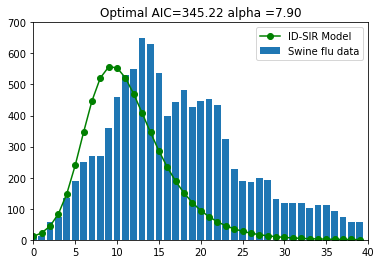

In [839]:
day40 = np.arange(0,40,1)
fig, ax = plt.subplots()

ax.axis([0,40,0,700])

l, = ax.plot([],[],color='green',marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')
tbeta = 39
BETA = 0.232
GAMMA = (1/6)
def animate(i):
    alpha = 4 + 0.1*i
    B = BETA*alpha
    G = GAMMA*alpha
    sol66 = ID_model(S0, I0, R0, tbeta, B, G)
    l.set_data(day40, sol66[1]*18233)
    #i=i+1
    #plt.title('alpha=%.2f beta =%.3f'%(alpha,BETA))
    plt.title('Optimal AIC=%.2f alpha =%.2f'%(AICvalues[i],alpha))
    

ani = FuncAnimation(fig, animate, frames=40, interval = 250)

plt.bar(day40,Infected, label = 'Swine flu data')
plt.legend()

from IPython.display import HTML
HTML(ani.to_jshtml())

In [840]:
# Optimal AIC at each step
AICvalues2 = np.zeros(31)
GAMMA = (1/6)
Check = 10000
i=0
alpha = 5.4
BETA = 0.22
while(i<31):
    B = BETA*alpha
    G = GAMMA*alpha
    sol66 = ID_model(S0, I0, R0, tbeta, B, G)
    TrueAIC = AIC(sol66[1],Infected,2)
    if(Check>TrueAIC):
            Check = TrueAIC
    AICvalues2[i]=Check
    BETA = BETA + 0.001
    i=i+1

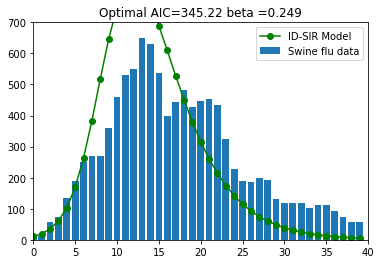

In [841]:
day40 = np.arange(0,40,1)
fig, ax = plt.subplots()

ax.axis([0,40,0,700])

l, = ax.plot([],[],color='green',marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')
tbeta = 39

GAMMA = (1/6)
alpha = 5.4
def animate(i):
    BETA = 0.22 + i*0.001
    B = BETA*alpha
    G = GAMMA*alpha
    sol66 = ID_model(S0, I0, R0, tbeta, B, G)
    l.set_data(day40, sol66[1]*18233)
    #i=i+1
    #plt.title('alpha=%.2f beta =%.3f'%(alpha,BETA))
    plt.title('Optimal AIC=%.2f beta =%.3f'%(AICvalues2[i],BETA))
    

ani = FuncAnimation(fig, animate, frames=30, interval = 250)

plt.bar(day40,Infected, label = 'Swine flu data')
plt.legend()

from IPython.display import HTML
HTML(ani.to_jshtml())

#ani.save("/Users/liamgallagher/Desktop/gif2.gif")

# Beta Estimation for cts Model

In [842]:
tcts = np.linspace(0,40,60000)

beta = (0.223)*6.2
gamma = (1/6)*6.2
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))
Ans = solutionbetcts[:,1]

Dailycts = np.zeros(40)
i=0
while(i<40):
    Dailycts[i] = Ans[1500*i]
    i=i+1 

beta = (0.223)*6.2
gamma = (1/6)*6.2
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))
Ans = solutionbetcts[:,1] 

Day2cts = np.zeros(20)
i=0
while(i<20):
    Day2cts[i] = Ans[3000*i]
    i=i+1 
    
beta = (0.223)*6.2
gamma = (1/6)*6.2
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))
Ans = solutionbetcts[:,1] 

Day3cts = np.zeros(14)
i=0
while(i<14):
    Day3cts[i] = Ans[4500*i]
    i=i+1 

beta = (0.219)*6.6
gamma = (1/6)*6.6
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))
Ans = solutionbetcts[:,1]    

Day4cts = np.zeros(10)
i=0
while(i<10):
    Day4cts[i] = Ans[6000*i]
    i=i+1  

In [843]:
# look offically
Dailycts_ans = AIC(Dailycts,Infected,2)
Day2cts_ans = AIC(Day2cts,Infected2,2)
Day3cts_ans = AIC(Day3cts,Infected3,2)
Day4cts_ans = AIC(Day4cts,Infected4,2)
print(Dailycts_ans)
print(Day2cts_ans)
print(Day3cts_ans)
print(Day4cts_ans)

381.450076637868
195.27616523914165
135.67799706767684
103.04543410191786


# Find Parameters and Data Fitting

In [844]:
tbeta = 39
tcts = np.linspace(0,40,60000)
B = (0.227)*6.6
G = (1/6)*6.6

solutionbetaED = ED_model(S0, I0, R0, tbeta, B, G)

B = (0.232)*5.4
G = (1/6)*5.4

solutionbetaID = ID_model(S0, I0, R0, tbeta, B, G)

beta = (0.223)*6.2
gamma = (1/6)*6.2
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))

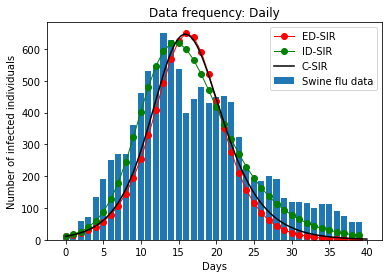

In [845]:
day40 = np.arange(0,40,1)
plt.bar(day40,Infected, label = 'Swine flu data')

plt.plot(day40, solutionbetaED[1]*18233, color='red',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=6, label='ED-SIR')

plt.plot(day40, solutionbetaID[1]*18233, color='green',linewidth = 1, marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR')

plt.plot(tcts, solutionbetcts[:,1]*18233, label="C-SIR", color='black')

plt.title('Data frequency: Daily')
plt.xlabel('Days')
plt.ylabel('Number of infected individuals')
plt.legend()
#plt.show()
plt.savefig("/Users/liamgallagher/Desktop/Bioday1.png")

# Day 2

In [846]:
# Day 2
tbeta = 19
tcts = np.linspace(0,40,60000)
B = (0.229)*13.6
G = (1/6)*13.6

solutionbetaED2 = ED_model(S0, I0, R0, tbeta, B, G)

B = (0.237)*9.6
G = (1/6)*9.6
solutionbetaID2 = ID_model(S0, I0, R0, tbeta, B, G)

beta = (0.223)*6.2
gamma = (1/6)*6.2
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))

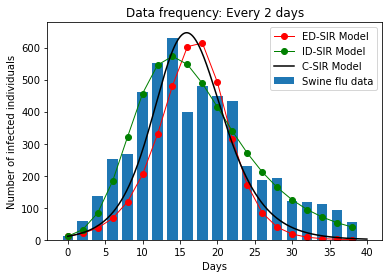

In [847]:
day20 = np.arange(0,40,2)
plt.bar(day20,Infected2, label = 'Swine flu data',width = 1.4)
# ED SIR
plt.plot(day20, solutionbetaED2[1]*18233, color='red',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=6, label='ED-SIR Model')

# ID SIR
plt.plot(day20, solutionbetaID2[1]*18233, color='green',linewidth = 1, marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')
# SIR
plt.plot(tcts, solutionbetcts[:,1]*18233, color = "black", label = "C-SIR Model")

plt.title('Data frequency: Every 2 days')
plt.xlabel('Days')
plt.ylabel('Number of infected individuals')
plt.legend()

plt.savefig("/Users/liamgallagher/Desktop/Bioday2.png")

# Day 3

In [848]:
# Day 3
tbeta = 13
tcts = np.linspace(0,40,60000)
B = (0.233)*21.2
G = (1/6)*21.2

solutionbetaED3 = ED_model(S0, I0, R0, tbeta, B, G)

B = (0.24)*13
G = (1/6)*13
solutionbetaID3 = ID_model(S0, I0, R0, tbeta, B, G)

beta = (0.223)*6.2
gamma = (1/6)*6.2
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))
#Try cts model

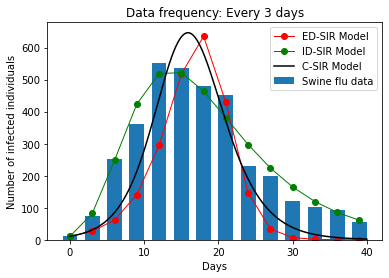

In [849]:
day14 = np.arange(0,42,3)
plt.bar(day14,Infected3, label = 'Swine flu data',width = 2)
# ED SIR
plt.plot(day14, solutionbetaED3[1]*18233, color='red',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=6, label='ED-SIR Model')

# ID SIR
plt.plot(day14, solutionbetaID3[1]*18233, color='green',linewidth = 1, marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')
# SIR
plt.plot(tcts, solutionbetcts[:,1]*18233, color = "black", label = "C-SIR Model")

plt.title('Data frequency: Every 3 days')
plt.xlabel('Days')
plt.ylabel('Number of infected individuals')
plt.legend()

# Day 4

In [850]:
# Day 4
tbeta = 9
tcts = np.linspace(0,40,60000)
B = (0.229)*30
G = (1/6)*30

solutionbetaED4 = ED_model(S0, I0, R0, tbeta, B, G)

B = (0.237)*16.7
G = (1/6)*16.7
solutionbetaID4 = ID_model(S0, I0, R0, tbeta, B, G)

beta = (0.219)*6.6
gamma = (1/6)*6.6
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))

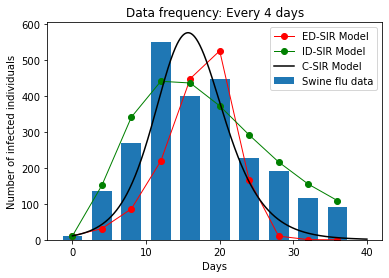

In [851]:
day10 = np.arange(0,40,4)
plt.bar(day10,Infected4, label = 'Swine flu data',width = 2.7)

# ED SIR
plt.plot(day10, solutionbetaED4[1]*18233, color='red',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=6, label='ED-SIR Model')

# ID SIR
plt.plot(day10, solutionbetaID4[1]*18233, color='green',linewidth = 1, marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')
# SIR
plt.plot(tcts, solutionbetcts[:,1]*18233, color = "black", label = "C-SIR Model")

plt.title('Data frequency: Every 4 days')
plt.xlabel('Days')
plt.ylabel('Number of infected individuals')
plt.legend()

plt.savefig("/Users/liamgallagher/Desktop/Bioday4.png")

In [852]:
DailyExplicit = AIC(solutionbetaED[1],Infected,2)
DailyImplicit = AIC(solutionbetaID[1],Infected,2)
Day2Explicit = AIC(solutionbetaED2[1],Infected2,2)
Day2Implicit = AIC(solutionbetaID2[1],Infected2,2)
Day3Explicit = AIC(solutionbetaED3[1],Infected3,2)
Day3Implicit = AIC(solutionbetaID3[1],Infected3,2)
Day4Explicit = AIC(solutionbetaED4[1],Infected4,2)
Day4Implicit = AIC(solutionbetaID4[1],Infected4,2)

Dailycts_ans = AIC(Dailycts,Infected,2)
Day2cts_ans = AIC(Day2cts,Infected2,2)
Day3cts_ans = AIC(Day3cts,Infected3,2)
Day4cts_ans = AIC(Day4cts,Infected4,2)

Check = AIC(solutionbetaED[1],Infected,2)

In [853]:
DATASET = {
    'Data frequency': ['Daily','Every 2 days','Every 3 days','Every 4 days'],
    'C-SIR Model' : [Dailycts_ans, Day2cts_ans, Day3cts_ans, Day4cts_ans],
    'ED-SIR Model' : [DailyExplicit,Day2Explicit,Day3Explicit,Day4Explicit],
    'ID-SIR Model' : [DailyImplicit,Day2Implicit,Day3Implicit,Day4Implicit]
}

In [854]:
from tabulate import tabulate
import numpy as np

print(tabulate(DATASET, headers = "keys", tablefmt="fancy_grid"))

╒══════════════════╤═══════════════╤════════════════╤════════════════╕
│ Data frequency   │   C-SIR Model │   ED-SIR Model │   ID-SIR Model │
╞══════════════════╪═══════════════╪════════════════╪════════════════╡
│ Daily            │       381.45  │        390.507 │       345.224  │
├──────────────────┼───────────────┼────────────────┼────────────────┤
│ Every 2 days     │       195.276 │        203.367 │       164.911  │
├──────────────────┼───────────────┼────────────────┼────────────────┤
│ Every 3 days     │       135.678 │        144.997 │       108.894  │
├──────────────────┼───────────────┼────────────────┼────────────────┤
│ Every 4 days     │       103.045 │        109.685 │        90.2545 │
╘══════════════════╧═══════════════╧════════════════╧════════════════╛


<Figure size 432x288 with 0 Axes>

# CO-VID Data

In [855]:
# Data on the first 60 days of covid in Ireland.
DailyCasesIre = [330,343,221,359,376,229,386,701,377,577,936,631,388,401,493,778,709,724,1068,832,992,727,839,696,1169,
                 515,345,253,507,331,424,402,212,325,295,200,294,302,255,235,204,219,121,102,126,191,74,69,54,40,38,21,
                 27,8,14,2,1,5,7,4]

# Gotten from this website
# https://data.europa.eu/data/datasets/covid-19-coronavirus-data?locale=en

IreCases = np.flip(DailyCasesIre)

# Sort Data

In [856]:
# Takes 10 days to recover from Covid
i=0
day60 = np.arange(0,60,1)
Caught = 0
recovery = 10
COVIDInfected = np.zeros([60])
while(i<60):
    Caught += IreCases[i]
    if(i>=recovery):
        Caught = Caught - IreCases[i-recovery]
    
    COVIDInfected[i] = Caught
    i=i+1
    
#plt.bar(day60,COVIDInfected)

In [857]:
COVIDInfected2 = np.zeros([30])
day30 = np.arange(0,60,2)
Caught = 0
i=0
j=0
while(i<60):
    Caught += IreCases[i] + IreCases[i+1]
    if(i>=recovery):
        Caught = Caught - IreCases[i-recovery] - IreCases[i+1-recovery]

    COVIDInfected2[j] = Caught
    i=i+2
    j=j+1
#plt.bar(day30,COVIDInfected2)

In [858]:
COVIDInfected3 = np.zeros([20])
day20 = np.arange(0,60,3)
Caught = 0
i=0
j=0
while(i<60):
    Caught += IreCases[i] + IreCases[i+1] + IreCases[i+2]
    if(i>=recovery):
        Caught = Caught - IreCases[i-recovery] - IreCases[i+1-recovery] - IreCases[i+2-recovery]
    
    COVIDInfected3[j] = Caught
    i=i+3
    j=j+1

#plt.bar(day20,COVIDInfected3)

In [859]:
COVIDInfected4 = np.zeros([15])
day15 = np.arange(0,60,4)
Caught = 0
i=0
j=0
while(i<60):
    Caught += IreCases[i] + IreCases[i+1] + IreCases[i+2] + IreCases[i+3] 
    
    if(i>recovery):
        Caught = Caught - IreCases[i-recovery] - IreCases[i+1-recovery] - IreCases[i+2-recovery] - IreCases[i+3-recovery]
        
    COVIDInfected4[j] = Caught
    
    i=i+4
    j=j+1

#plt.bar(day15,COVIDInfected4)

# Plot

In [860]:
def AIC(EXP,INF,k):
    i = 0
    SSR = 0
    AIC = 0
    nd = len(EXP)
    while(i<nd-1):
        SSR += (EXP[i]*4000000-INF[i])**2
        i=i+1
    AIC =  nd*np.log(SSR/nd)+((2*nd*(k+1))/(nd-k-2))
    
    return AIC

In [861]:
tbeta = 59
tcts = np.linspace(0,60,60000)
B = (0.178)*20
G = (1/6)*20

beta = (0.179)*17.9
gamma = (1/6)*17.9


S0 = (3999996/4000000)
I0 = (4/4000000)
R0 = 0

beta = (0.1784)*17.2
gamma = (1/6)*17.2
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))

B = (0.179)*15.4
G = (1/6)*15.4
solutionbetaID = ID_model(S0, I0, R0, tbeta, B, G)

B = (0.179)*17.9
G = (1/6)*17.9
solutionbetaED = ED_model(S0, I0, R0, tbeta, B, G)

In [862]:
tbeta = 29
S0 = (3999996/4000000)
I0 = (4/4000000)
R0 = 0

beta = (0.178)*18.1
gamma = (1/6)*18.1
solutionbetcts2 = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))

B = (0.18)*27.6
G = (1/6)*27.6
solutionbetaID2 = ID_model(S0, I0, R0, tbeta, B, G)

B = (0.179)*39.6
G = (1/6)*39.6
solutionbetaED2 = ED_model(S0, I0, R0, tbeta, B, G)

In [863]:
tbeta = 19
S0 = (3999996/4000000)
I0 = (4/4000000)
R0 = 0

beta = (0.178)*18.5
gamma = (1/6)*18.5
solutionbetcts3 = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))

B = (0.18)*39
G = (1/6)*39
solutionbetaID3 = ID_model(S0, I0, R0, tbeta, B, G)

B = (0.18)*62.1
G = (1/6)*62.1
solutionbetaED3 = ED_model(S0, I0, R0, tbeta, B, G)

In [864]:
tbeta = 14
S0 = (3999996/4000000)
I0 = (4/4000000)
R0 = 0

beta = (0.178)*19.2
gamma = (1/6)*19.2
solutionbetcts4 = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))

B = (0.181)*46.4
G = (1/6)*46.4
solutionbetaID4 = ID_model(S0, I0, R0, tbeta, B, G)

B = (0.181)*88.1
G = (1/6)*88.1
solutionbetaED4 = ED_model(S0, I0, R0, tbeta, B, G)

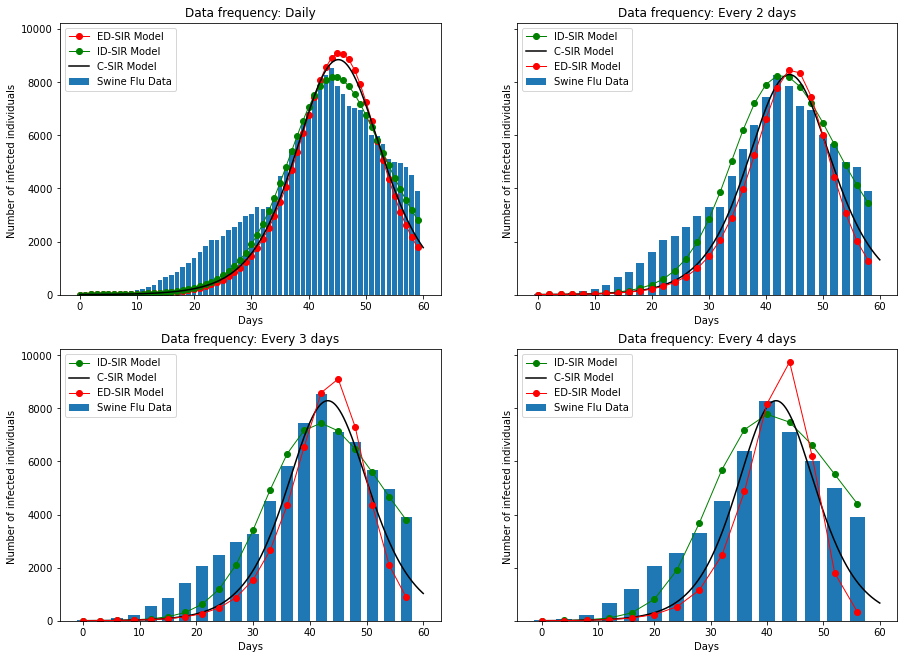

In [865]:
fig, axs = plt.subplots(2, 2,sharey=True,figsize=[15,11])

axs[0,0].plot(day60,solutionbetaED[1]*4000000,color='red',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=6, label='ED-SIR Model')
axs[0,0].plot(day60,solutionbetaID[1]*4000000, color='green',linewidth = 1, marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')
axs[0,0].plot(tcts, solutionbetcts[:,1]*4000000, color = "black", label = "C-SIR Model")
axs[0,0].bar(day60,COVIDInfected,label = 'Swine Flu Data')
axs[0,0].set_title("Data frequency: Daily")
axs[0,0].set_xlabel("Days")
axs[0,0].set_ylabel("Number of infected individuals ")
axs[0,0].legend()

axs[0,1].plot(day30,solutionbetaID2[1]*4000000, color='green',linewidth = 1, marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')
axs[0,1].plot(tcts, solutionbetcts2[:,1]*4000000, color = "black", label = "C-SIR Model")
axs[0,1].plot(day30,solutionbetaED2[1]*4000000,color='red',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=6, label='ED-SIR Model')
axs[0,1].bar(day30,COVIDInfected2,width=1.4,label = 'Swine Flu Data')
axs[0,1].set_title("Data frequency: Every 2 days")
axs[0,1].set_xlabel("Days")
axs[0,1].set_ylabel("Number of infected individuals ")
axs[0,1].legend()

axs[1,0].plot(day20,solutionbetaID3[1]*4000000, color='green',linewidth = 1, marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')
axs[1,0].plot(tcts, solutionbetcts3[:,1]*4000000, color = "black", label = "C-SIR Model")
axs[1,0].plot(day20,solutionbetaED3[1]*4000000,color='red',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=6, label='ED-SIR Model')
axs[1,0].bar(day20,COVIDInfected3,label='Swine Flu Data',width=2)
axs[1,0].set_title("Data frequency: Every 3 days")
axs[1,0].set_xlabel("Days")
axs[1,0].set_ylabel("Number of infected individuals ")
axs[1,0].legend()


axs[1,1].plot(day15,solutionbetaID4[1]*4000000, color='green',linewidth = 1, marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')
axs[1,1].plot(tcts, solutionbetcts4[:,1]*4000000, color = "black", label = "C-SIR Model")
axs[1,1].plot(day15,solutionbetaED4[1]*4000000,color='red',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=6, label='ED-SIR Model')
axs[1,1].bar(day15,COVIDInfected4,label='Swine Flu Data',width=2.7)
axs[1,1].set_title("Data frequency: Every 4 days")
axs[1,1].set_xlabel("Days")
axs[1,1].set_ylabel("Number of infected individuals ")
axs[1,1].legend()

plt.savefig("/Users/liamgallagher/Desktop/Bioday10.png")

# Parameter Search

In [866]:
# Parameter search
def SearchAIC_ED(Infected, tbeta, alpha):
    i=0
    Check = 10000.0
    GAMMA = (1/6)
    while(i<61): 
        BETA = 0.17
        j=0
        while(j<31):
            B = BETA*alpha
            G = GAMMA*alpha
            sol66 = ED_model(S0, I0, R0, tbeta, B, G)
  
            TrueAIC = AIC(sol66[1],Infected,2)
        
            if(Check>TrueAIC):
                Check = TrueAIC
                Betaval = B/alpha
                alphaval = alpha

            BETA = BETA + 0.001
            j=j+1
    
        alpha = alpha + 0.1
        i=i+1
    
    return ([Check, Betaval, alphaval])
print(SearchAIC_ED(COVIDInfected, 59,17))
print(SearchAIC_ED(COVIDInfected2, 29,37))
print(SearchAIC_ED(COVIDInfected3, 19,60))
print(SearchAIC_ED(COVIDInfected4, 14,86))

[840.9233788598763, 0.17900000000000002, 17.900000000000013]
[433.2271154744242, 0.17900000000000002, 39.60000000000004]
[296.3107952546465, 0.18000000000000002, 62.10000000000003]
[229.08735968959425, 0.18100000000000002, 88.09999999999988]


In [867]:
def SearchAIC_ID(Infected, tbeta, alpha):
    i=0
    Check = 10000.0
    GAMMA = (1/6)
    while(i<61): 
        BETA = 0.17
        j=0
        while(j<31):
            B = BETA*alpha
            G = GAMMA*alpha
            sol66 = ID_model(S0, I0, R0, tbeta, B, G)
  
            TrueAIC = AIC(sol66[1],Infected,2)
        
            if(Check>TrueAIC):
                Check = TrueAIC
                Betaval = B/alpha
                alphaval = alpha
            BETA = BETA + 0.001
            j=j+1
    
        alpha = alpha + 0.1
        i=i+1
    
    return ([Check, Betaval, alphaval])   
print(SearchAIC_ID(COVIDInfected, 59,15))
print(SearchAIC_ID(COVIDInfected2, 29,27))
print(SearchAIC_ID(COVIDInfected3, 19,37))
print(SearchAIC_ID(COVIDInfected4, 14,44))

[798.9531720149022, 0.17900000000000002, 15.399999999999999]
[396.69707321490216, 0.18000000000000002, 27.60000000000001]
[266.0166350022779, 0.18000000000000002, 39.00000000000003]
[202.63274034110566, 0.18100000000000002, 46.400000000000034]


# Extract continous values

In [868]:
# Extract cts values
beta = (0.1784)*17.2
gamma = (1/6)*17.2
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))
Ans = solutionbetcts[:,1]

Dailycts = np.zeros(60)
i=0
while(i<60):
    Dailycts[i] = Ans[1000*i]
    i=i+1

beta = (0.178)*18.1
gamma = (1/6)*18.1
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))
Ans = solutionbetcts[:,1]

Dailycts2 = np.zeros(30)
i=0
while(i<30):
    Dailycts2[i] = Ans[2000*i]
    i=i+1 

beta = (0.178)*18.5
gamma = (1/6)*18.5
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))
Ans = solutionbetcts[:,1]

Dailycts3 = np.zeros(20)
i=0
while(i<20):
    Dailycts3[i] = Ans[3000*i]
    i=i+1 
    
beta = (0.178)*19.2
gamma = (1/6)*19.2
solutionbetcts = integrate.odeint(SIR_model, [S0, I0, R0], tcts, args=(beta,gamma))
Ans = solutionbetcts[:,1]

Dailycts4 = np.zeros(15)
i=0
while(i<15):
    Dailycts4[i] = Ans[4000*i]
    i=i+1 

# AIC values

In [869]:
#AIC values
AICIreED = AIC(solutionbetaED[1],COVIDInfected,2)
AICIreID = AIC(solutionbetaID[1],COVIDInfected,2)
AICcts = AIC(Dailycts,COVIDInfected,2)

AICIreEDday2 = AIC(solutionbetaED2[1],COVIDInfected2,2)
AICIreIDday2 = AIC(solutionbetaID2[1],COVIDInfected2,2)
AICctsday2 =  AIC(Dailycts2,COVIDInfected2,2)

AICIreEDday3 = AIC(solutionbetaED3[1],COVIDInfected3,2)
AICIreIDday3 = AIC(solutionbetaID3[1],COVIDInfected3,2)
AICctsday3 =  AIC(Dailycts3,COVIDInfected3,2)

AICIreEDday4 = AIC(solutionbetaED4[1],COVIDInfected4,2)
AICIreIDday4 = AIC(solutionbetaID4[1],COVIDInfected4,2)
AICctsday4 =  AIC(Dailycts4,COVIDInfected4,2)

In [870]:
DATASET = {
    'Data frequency': ['Daily','Every 2 days','Every 3 days','Every 4 days'],
    'C-SIR Model' : [AICcts, AICctsday2, AICctsday3, AICctsday4],
    'ED-SIR Model' : [AICIreED,AICIreEDday2,AICIreEDday3,AICIreEDday4],
    'ID-SIR Model' : [AICIreID,AICIreIDday2,AICIreIDday3,AICIreIDday4]
}

print(tabulate(DATASET, headers = "keys", tablefmt="fancy_grid"))
#plt.savefig("/Users/liamgallagher/Desktop/Bioday5.png")

╒══════════════════╤═══════════════╤════════════════╤════════════════╕
│ Data frequency   │   C-SIR Model │   ED-SIR Model │   ID-SIR Model │
╞══════════════════╪═══════════════╪════════════════╪════════════════╡
│ Daily            │       829.342 │        840.923 │        798.953 │
├──────────────────┼───────────────┼────────────────┼────────────────┤
│ Every 2 days     │       422.223 │        433.227 │        396.697 │
├──────────────────┼───────────────┼────────────────┼────────────────┤
│ Every 3 days     │       286.446 │        296.311 │        266.017 │
├──────────────────┼───────────────┼────────────────┼────────────────┤
│ Every 4 days     │       217.734 │        229.087 │        202.633 │
╘══════════════════╧═══════════════╧════════════════╧════════════════╛


# ################################################################

# FAILED ATTEMPTS

In [46]:
# basic SIR
i = 0
j = 0
Exp = np.zeros(10000)
while(i<60000):
    if(i%6==0):
        Exp[j]=solution[i,1]
        j=j+1
    i=i+1
tExp = np.linspace(0,40,10000)
#plt.plot(tExp, Exp)

In [47]:
# Collect points where cts model is same as ID and ED
DailySR = np.zeros(40)
i=0
while(i<40):
    DailySR[i] = Exp[250*i]
    i=i+1 
    
Day2SR = np.zeros(20)
i=0
while(i<20):
    Day2SR[i] = Exp[500*i]
    i=i+1 
    
Day3SR = np.zeros(14)
i=0
while(i<14):
    Day3SR[i] = Exp[750*i]
    i=i+1 
    
Day4SR = np.zeros(10)
i=0
while(i<10):
    Day4SR[i] = Exp[1000*i]
    i=i+1  

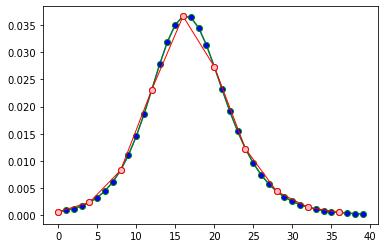

In [48]:
# Take one in every 6 values
# Imagine data is taken every 4 hours.
# 1 day
# E-D SIR
i=0
j=0
days1 = np.arange(0,40,1)
Exp1 = np.zeros(40)
while(i<t2):
    if(i%6==0):
        Exp1[j]=solution2[1][i]
        j=j+1
    i=i+1

plt.plot(Exp1)
plt.plot(days1, Exp1, color='green',linewidth = 1, marker ='o', markerfacecolor='blue',
         markersize=6, label='day 1')

Exp1Day4 = np.zeros(10)
i=0
j=0
while(i<40):
    if(i%4==0):
        Exp1Day4[j]=Exp1[i]
        j=j+1
    i=i+1
days41 = np.arange(0,40,4)
plt.plot(days41, Exp1Day4, color='red',linewidth = 1, marker ='o', markerfacecolor='pink',
         markersize=6, label='day 1')

##########
#plt.plot(days1, solutionbeta[1], label="I(t)", color = "black", marker ='o', markerfacecolor='pink')

In [49]:
# Day 2
Exp1Day2 = np.zeros(20)
i=0
j=0
while(i<40):
    if(i%2==0):
        Exp1Day2[j]=Exp1[i]
        j=j+1
    i=i+1

# Day 3
Exp1Day3 = np.zeros(14)
i=0
j=0
while(i<40):
    if(i%3==0):
        Exp1Day3[j]=Exp1[i]
        j=j+1
    i=i+1


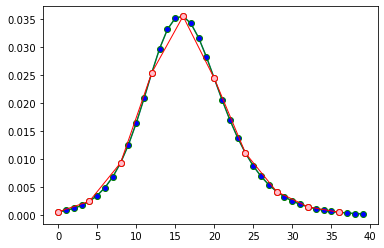

In [50]:
# ID-SIR
i=0
j=0
days1 = np.arange(0,40,1)
Exp2 = np.zeros(40)
while(i<t3):
    if(i%6==0):
        Exp2[j]=solution3[1][i]
        j=j+1
    i=i+1

plt.plot(Exp2)
plt.plot(days1, Exp2, color='green',linewidth = 1, marker ='o', markerfacecolor='blue',
         markersize=6, label='day 1')

Exp2Day4 = np.zeros(10)
i=0
j=0
while(i<40):
    if(i%4==0):
        Exp2Day4[j]=Exp2[i]
        j=j+1
    i=i+1
days41 = np.arange(0,40,4)
plt.plot(days41, Exp2Day4, color='red',linewidth = 1, marker ='o', markerfacecolor='pink',
         markersize=6, label='day 1')

In [51]:
# Day 2
Exp2Day2 = np.zeros(20)
i=0
j=0
while(i<40):
    if(i%2==0):
        Exp2Day2[j]=Exp2[i]
        j=j+1
    i=i+1

# Day 3
Exp2Day3 = np.zeros(14)
i=0
j=0
while(i<40):
    if(i%3==0):
        Exp2Day3[j]=Exp2[i]
        j=j+1
    i=i+1
    

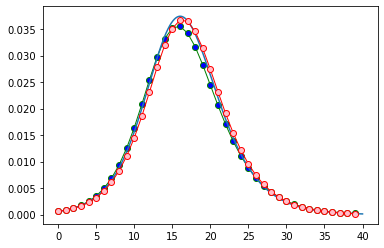

In [52]:
day2 = np.arange(0,40,4)
plt.plot(days1, Exp2, color='green',linewidth = 1, marker ='o', markerfacecolor='blue',
         markersize=6, label='day 1')
plt.plot(tExp, Exp)
plt.plot(days1, Exp1, color='red',linewidth = 1, marker ='o', markerfacecolor='pink',
         markersize=6, label='day 1')

# OG data fitting

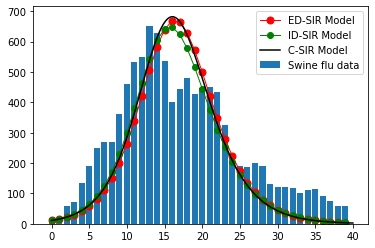

In [53]:
# Fit data Day 1
day40 = np.arange(0,40,1)
plt.bar(day40,Infected, label = 'Swine flu data')
# ED SIR
plt.plot(day40, Exp1*18233, color='red',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=7, label='ED-SIR Model')

# ID SIR
plt.plot(days1, Exp2*18233, color='green',linewidth = 1, marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')

# SIR
tExp = np.linspace(0,40,10000)
plt.plot(tExp, Exp*18233, color = "black", label = "C-SIR Model")


plt.legend()
plt.show()


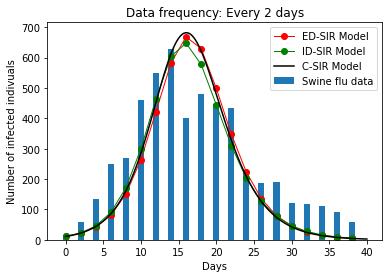

In [54]:
# Fit Data Day 2
day20 = np.arange(0,40,2)
plt.bar(day20,Infected2, label = 'Swine flu data')
# ED SIR
plt.plot(day20, Exp1Day2*18233, color='red',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=6, label='ED-SIR Model')

# ID SIR
plt.plot(day20, Exp2Day2*18233, color='green',linewidth = 1, marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')
# SIR
tExp = np.linspace(0,40,10000)
plt.plot(tExp, Exp*18233, color = "black", label = "C-SIR Model")

#ED change delta
#plt.plot(day20, solutionday2[1]*18233, color='green',linewidth = 1, marker ='o', markerfacecolor='black',
         #markersize=6, label='day 2')

plt.xlabel('Days')
plt.ylabel('Number of infected indivuals')
plt.title('Data frequency: Every 2 days')
plt.legend()
plt.show()

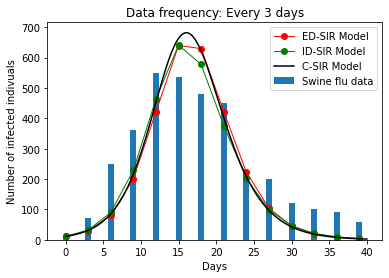

In [55]:
# Fit Data Day 3
day14 = np.arange(0,42,3)
plt.bar(day14,Infected3, label = 'Swine flu data')

# ED SIR
plt.plot(day14, Exp1Day3*18233, color='red',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=6, label='ED-SIR Model')
    
# ID SIR
plt.plot(day14, Exp2Day3*18233, color='green',linewidth = 1, marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')
# SIR
tExp = np.linspace(0,40,10000)
plt.plot(tExp, Exp*18233, color = "black", label = "C-SIR Model")



plt.xlabel('Days')
plt.ylabel('Number of infected indivuals')
plt.title('Data frequency: Every 3 days')
plt.legend()
plt.show()

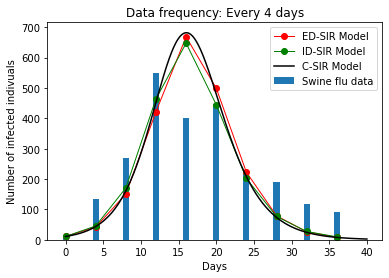

In [56]:
# Fit Data Day 4
day10 = np.arange(0,40,4)
plt.bar(day10,Infected4, label = 'Swine flu data')

# ED SIR
plt.plot(day10, Exp1Day4*18233, color='red',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=6, label='ED-SIR Model')

# ID SIR
plt.plot(day10, Exp2Day4*18233, color='green',linewidth = 1, marker ='o', markerfacecolor='green',
         markersize=6, label='ID-SIR Model')
# SIR
tExp = np.linspace(0,40,10000)
plt.plot(tExp, Exp*18233, color = "black", label = "C-SIR Model")

plt.xlabel('Days')
plt.ylabel('Number of infected indivuals')
plt.title('Data frequency: Every 4 days')
plt.legend()
plt.show()

In [57]:
DailyExplicit = AIC(Exp1,Infected,2)
DailyImplicit = AIC(Exp2,Infected,2)
Day2Explicit = AIC(Exp1Day2,Infected2,2)
Day2Implicit = AIC(Exp2Day2,Infected2,2)
Day3Explicit = AIC(Exp1Day3,Infected3,2)
Day3Implicit = AIC(Exp2Day3,Infected3,2)
Day4Explicit = AIC(Exp1Day4,Infected4,2)
Day4Implicit = AIC(Exp2Day4,Infected4,2)

DailySR_ans = AIC(DailySR,Infected,2)
Day2SR_ans = AIC(Day2SR,Infected2,2)
Day3SR_ans = AIC(Day3SR,Infected3,2)
Day4SR_ans = AIC(Day4SR,Infected4,2)

In [58]:
DATASET = {
    'Data frequency': ['Daily','Every 2 days','Every 3 days','Every 4 days'],
    'C-SIR Model' : [DailySR_ans, Day2SR_ans, Day3SR_ans, Day4SR_ans],
    'ED-SIR Model' : [DailyExplicit,Day2Explicit,Day3Explicit,Day4Explicit],
    'ID-SIR Model' : [DailyImplicit,Day2Implicit,Day3Implicit,Day4Implicit]
}

In [59]:
from tabulate import tabulate
import numpy as np

print(tabulate(DATASET, headers = "keys", tablefmt="fancy_grid"))

╒══════════════════╤═══════════════╤════════════════╤════════════════╕
│ Data frequency   │   C-SIR Model │   ED-SIR Model │   ID-SIR Model │
╞══════════════════╪═══════════════╪════════════════╪════════════════╡
│ Daily            │       383.21  │        385.346 │        376.214 │
├──────────────────┼───────────────┼────────────────┼────────────────┤
│ Every 2 days     │       196.168 │        196.966 │        192.837 │
├──────────────────┼───────────────┼────────────────┼────────────────┤
│ Every 3 days     │       136.164 │        136.805 │        133.699 │
├──────────────────┼───────────────┼────────────────┼────────────────┤
│ Every 4 days     │       104.977 │        105.126 │        102.935 │
╘══════════════════╧═══════════════╧════════════════╧════════════════╛


# Chaning t (Days)

In [60]:
# initial conditions
B = 0.35
G = 0.1
S0 = 0.9
I0 = 0.1
R0 = 0

In [61]:
t2 = 240
B = (0.225)
G = (1/6)
S0 = (18223/18233)
I0 = (11/18233)
R0 = 0
Rnumber = B/G


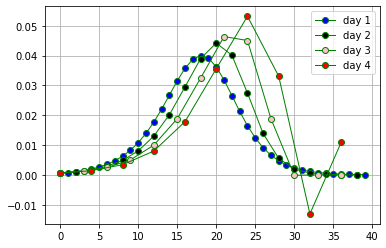

In [62]:
def ED_model2(S0, I0, R0, t, beta, gamma, c):
    S = np.zeros(t+1)
    I = np.zeros(t+1)
    R = np.zeros(t+1)

    i=0
    S[i] = S0
    I[i] = I0
    R[i] = R0
    
    while(i<t):
        
        dS_dt = -(beta/(1+beta*I[i]))*S[i]*I[i]
        dI_dt = (beta/(1+beta*I[i]))*S[i]*I[i] - gamma*I[i]
        dR_dt = gamma*I[i]
        
        S[i+1] = S[i] + c*dS_dt
        I[i+1] = I[i] + c*dI_dt
        R[i+1] = R[i] + c*dR_dt
        
        i=i+1
    
    return([S, I, R])

day1 = np.arange(0,40,1)
day2 = np.arange(0,20,1)
day3 = np.arange(0,13,1)
day4 = np.arange(0,10,1)

t1 = 39
t2 = 19
t3 = 12
t4 = 9

solutionday1 = ED_model2(S0, I0, R0, t1, B, G, 6)
solutionday2 = ED_model2(S0, I0, R0, t2, B, G, 12)
solutionday3 = ED_model2(S0, I0, R0, t3, B, G, 18)
solutionday4 = ED_model2(S0, I0, R0, t4, B, G, 24)

plt.plot(day1, solutionday1[1], color='green',linewidth = 1, marker ='o', markerfacecolor='blue',
         markersize=6, label='day 1')
plt.plot(2*day2, solutionday2[1], color='green',linewidth = 1, marker ='o', markerfacecolor='black',
         markersize=6, label='day 2')
plt.plot(3*day3, solutionday3[1], color='green',linewidth = 1, marker ='o', markerfacecolor='pink',
         markersize=6, label='day 3')
plt.plot(4*day4, solutionday4[1], color='green',linewidth = 1, marker ='o', markerfacecolor='red',
         markersize=6, label='day 4')


plt.legend()
plt.grid()
plt.show()